Nozzle Details
Outlet Radius: 0.035 m
Throat Radius: 0.013 m
Outlet Area: 0.003848 m²
Throat Area: 0.000531 m²
Position: 0 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1.1 kg/m3
Grain Outer Radius: 0.035 m
Grain Inner Radius: 0.0125 m
Grain Height: 0.3 m
Grain Volume: 0.001 m3
Grain Mass: 0.001 kg

Motor Details
Total Burning Time: 5 s
Total Propellant Mass: 3.201 kg
Average Propellant Exhaust Velocity: 1861.356 m/s
Average Thrust: 1191.680 N
Maximum Thrust: 1191.68 N at 0.0 s after ignition.
Total Impulse: 5958.400 Ns



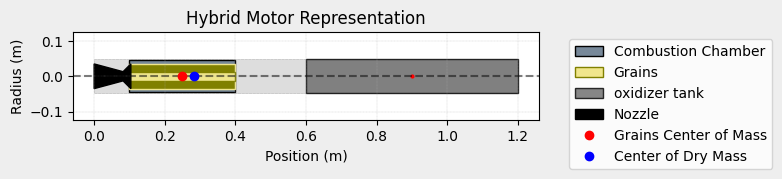

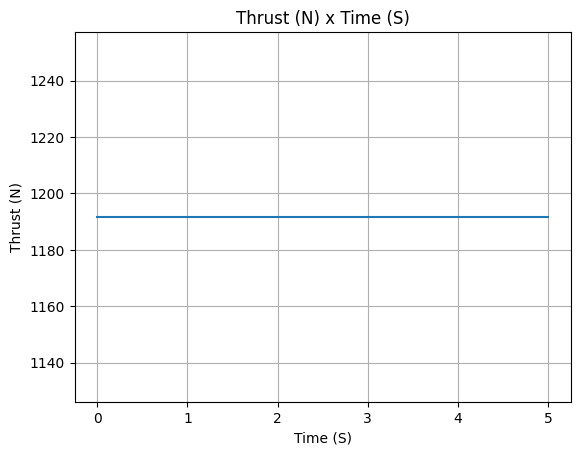

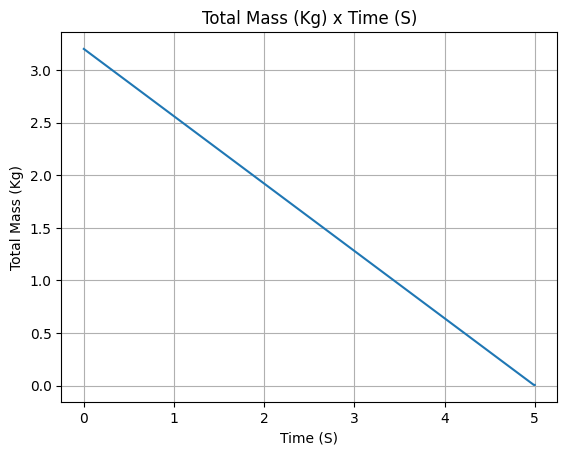

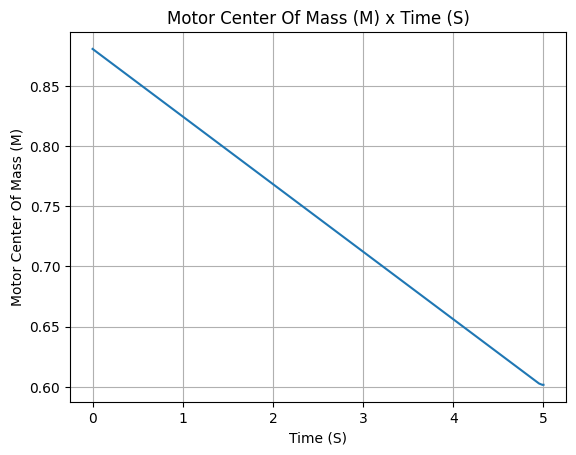

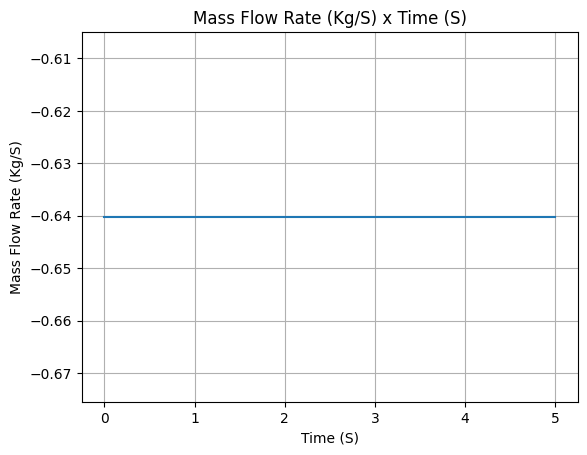

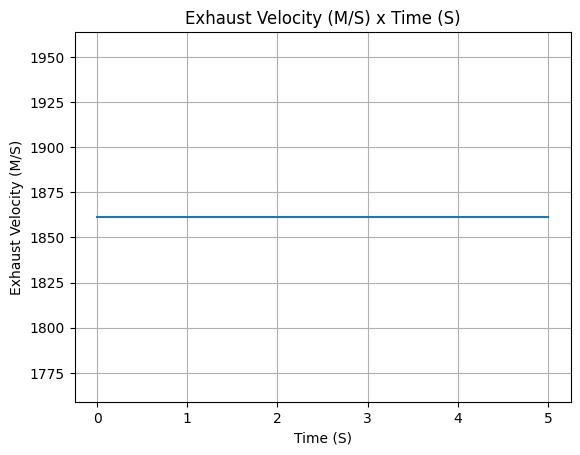

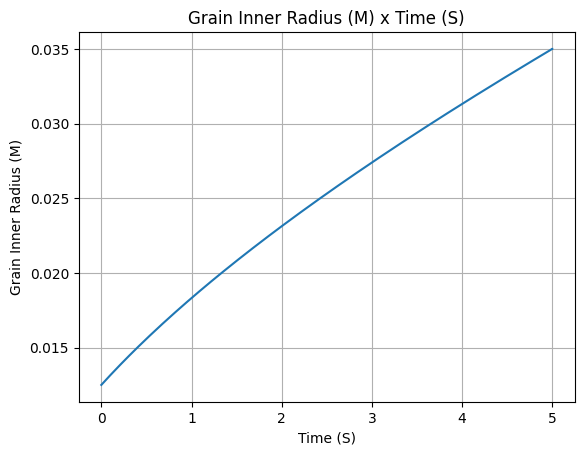

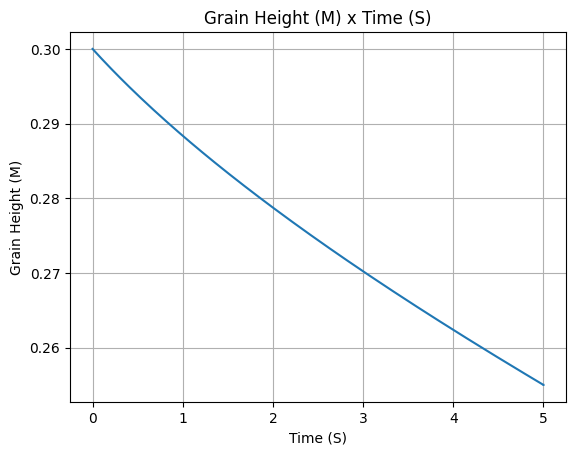

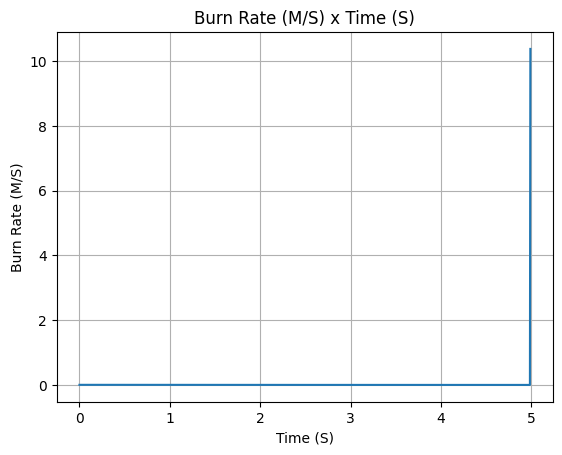

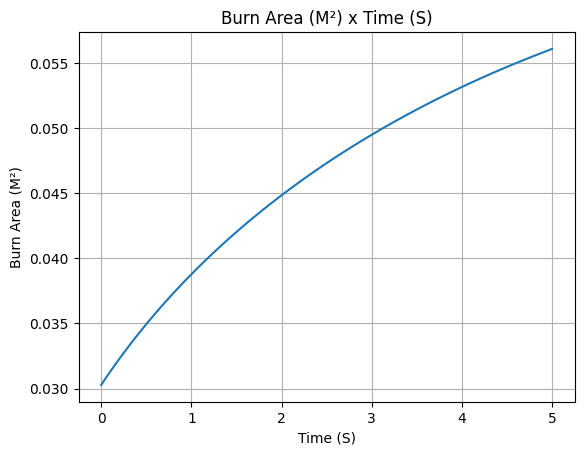

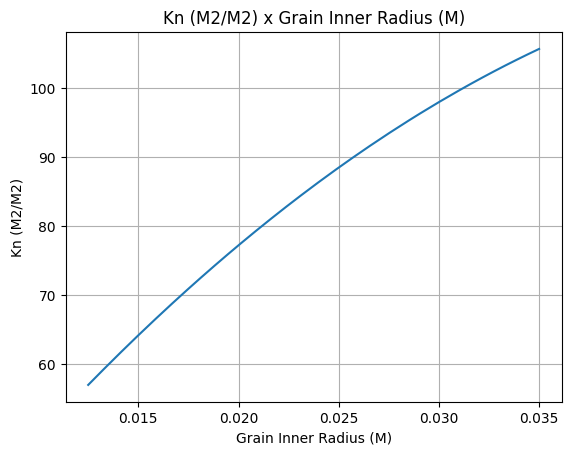

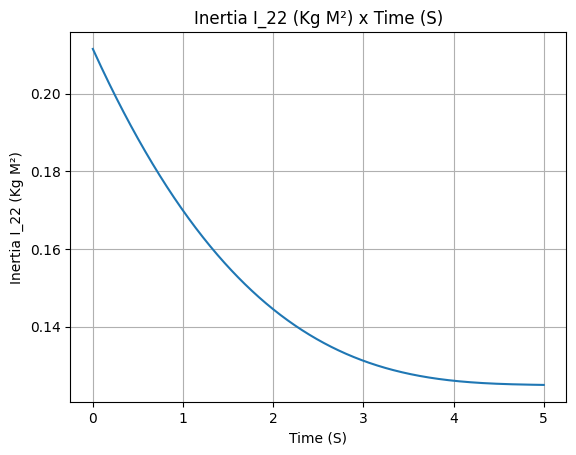

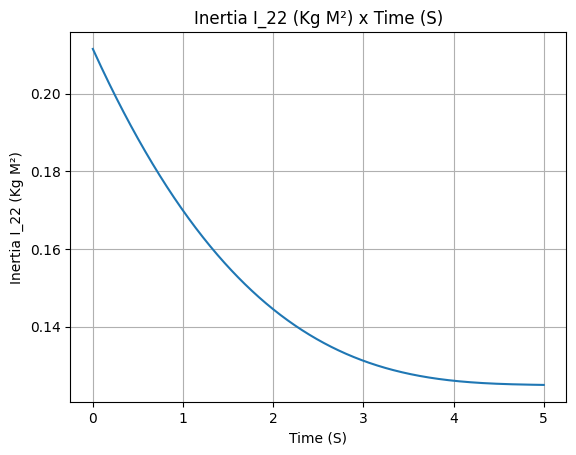

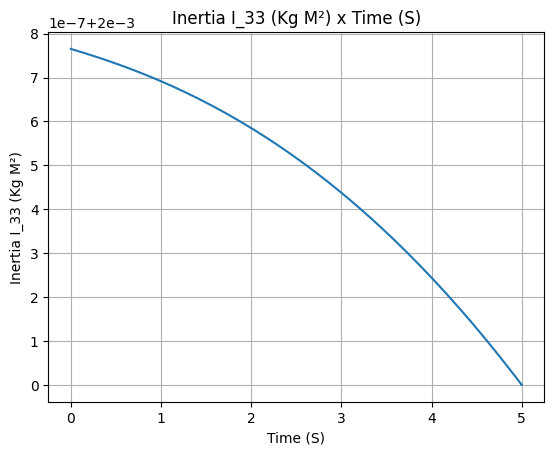

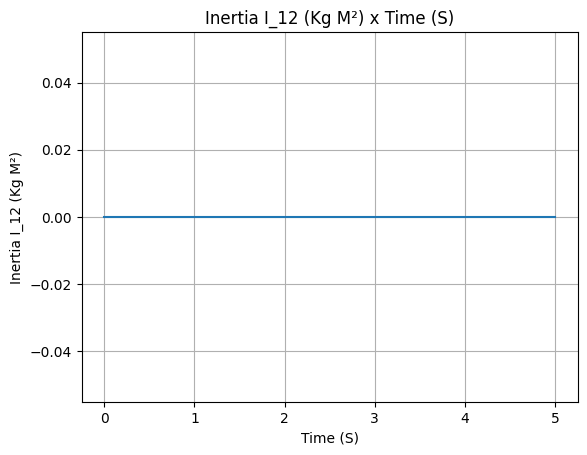

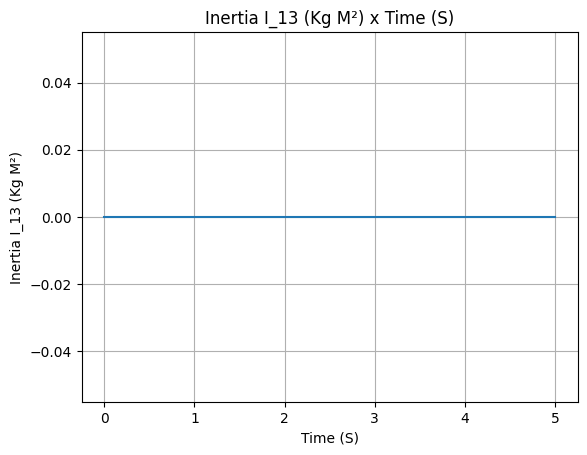

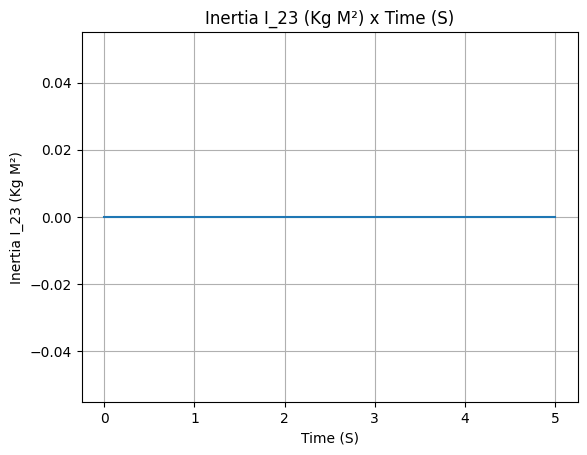


Inertia Details

Rocket Mass: 15.000 kg (without motor)
Rocket Dry Mass: 15.000 kg (with unloaded motor)
Rocket Loaded Mass: 18.201 kg (with loaded motor)
Rocket Inertia (with unloaded motor) 11: 4.725 kg*m2
Rocket Inertia (with unloaded motor) 22: 4.725 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.017 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.06 m
Rocket Frontal Area: 0.011310 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 1.470 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.589 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.104 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 6.938/rad

Center of Pressure

Nose Cone Center of P

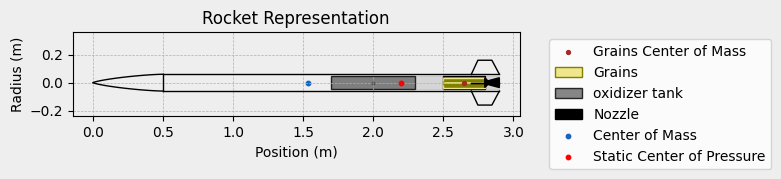


Mass Plots
----------------------------------------


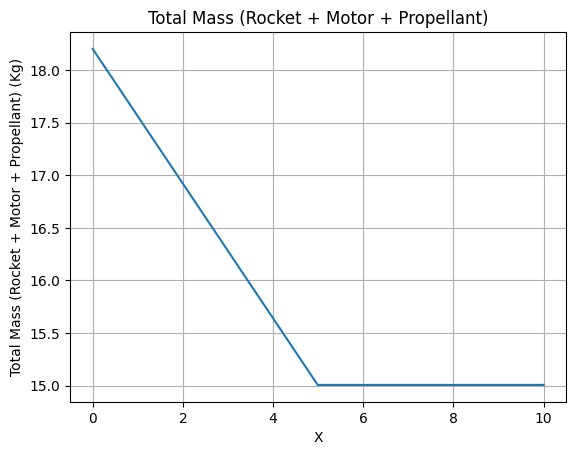

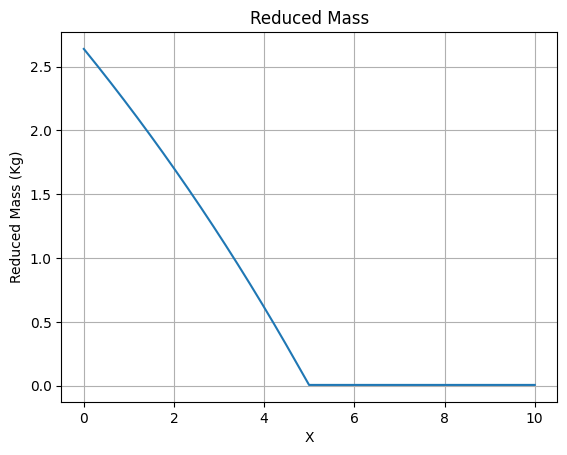


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


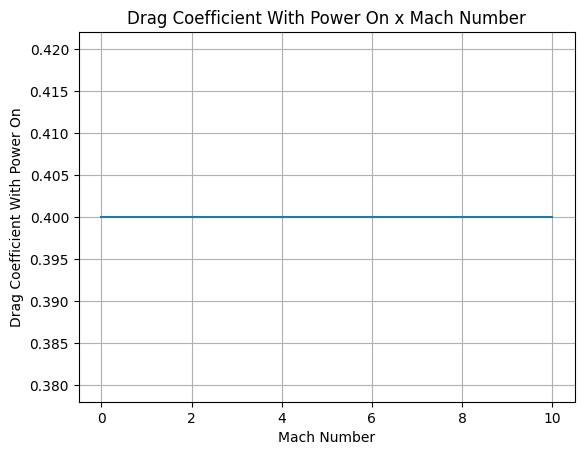

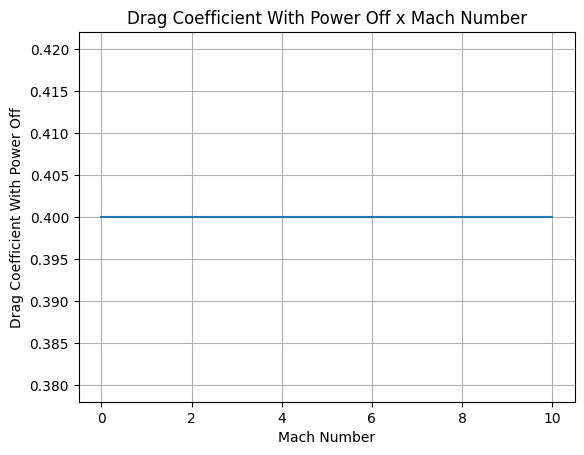


Stability Plots
--------------------


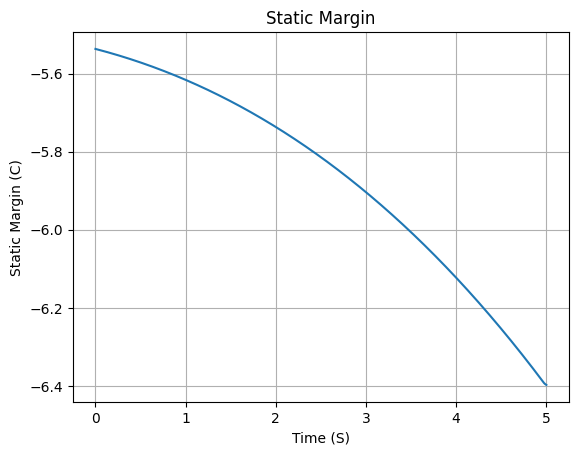

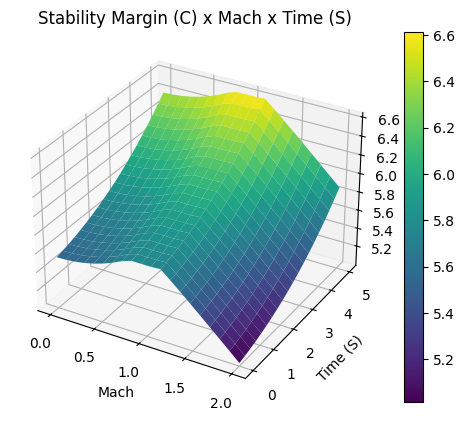


Thrust-to-Weight Plot
----------------------------------------


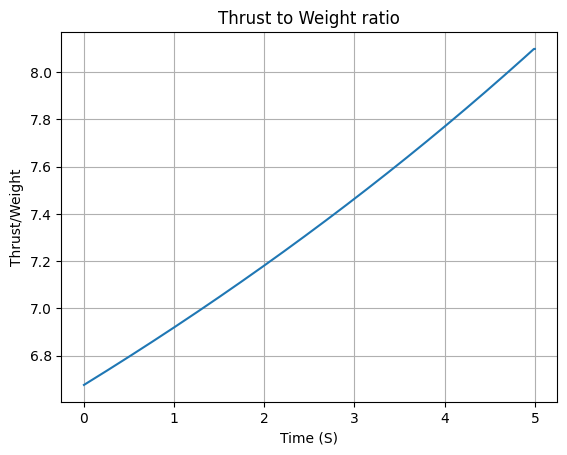


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 165.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.052 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -6.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: -10.00 m/s
Lateral Surface Wind Speed: 0.00 m/s


Launch Rail

Launch Rail Length: 12  m
Launch Rail Inclination: 84.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.657 s
Rail Departure Velocity: 37.067 m/s
Rail Departure Stability Margin: 5.589 c
Rail Departure Angle of Attack: 14.625°
Rail Departure Thrust-Weight Ratio: 6.834
Rail Departure Reynolds Number: 3.192e+05


Burn out State

Burn out time: 5.000 s
Altitude at burn out: 679.906 m (AGL)
Rocket velocity at burn out: 288.152 m/s
Freestream velocity at burn out: 292.045 m/s
Mach Number at burn out: 0.867
Kinetic energy at burn out

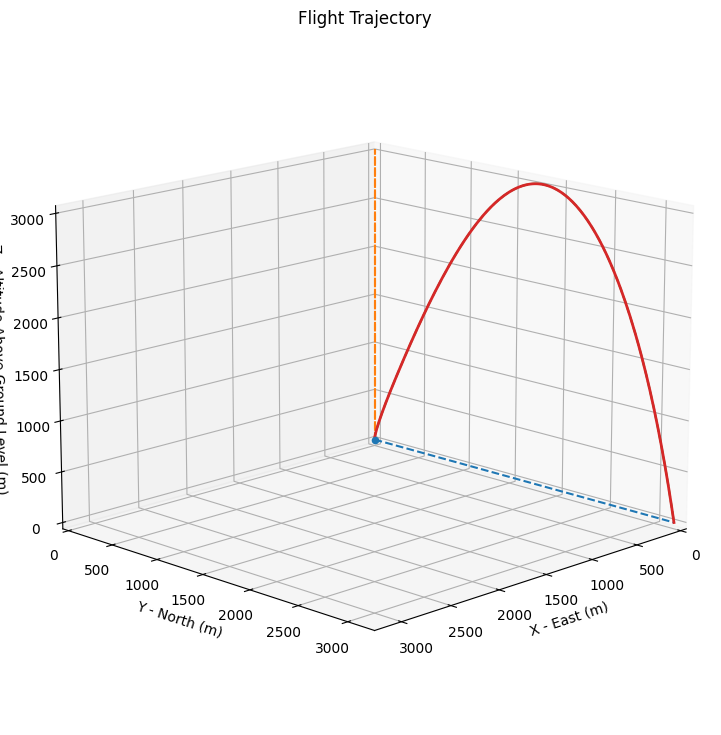



Trajectory Kinematic Plots



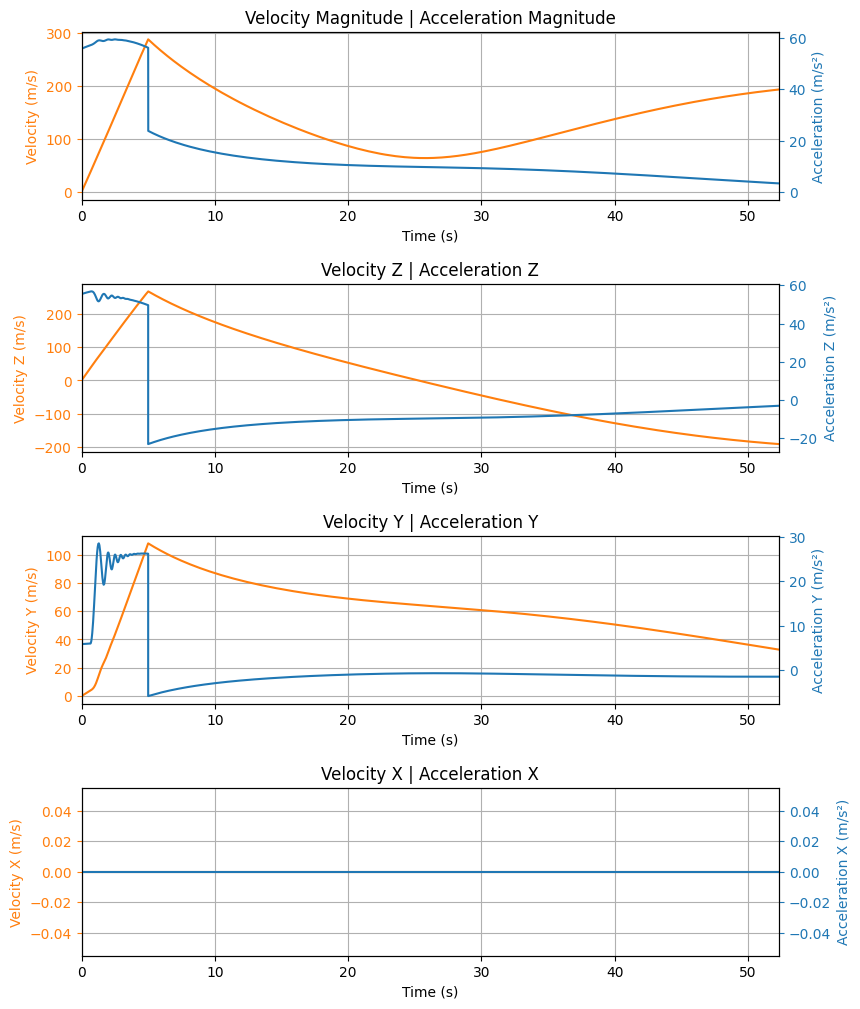



Angular Position Plots



In [ ]:
from rocketpy import Fluid, CylindricalTank, MassFlowRateBasedTank, HybridMotor
from rocketpy import Environment, Rocket, Flight



############################################ Hybrid

# fluids at 20°C
liquid_nox = Fluid(name="lNOx", density=786.6)
vapour_nox = Fluid(name="gNOx", density=159.4)

# Define tank geometry
tank_radius = 96 / 2000
tank_length = 0.6
tank_shape = CylindricalTank(tank_radius, tank_length)

# Define tank
burn_time = 5
nox_mass = 3.2
ullage_mass = nox_mass * 0.15
mass_flow = nox_mass / burn_time
isp = 190
grain_length = 0.3
nozzle_length = 0.10
plumbing_length = 0.2

oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer tank",
    geometry=tank_shape,
    flux_time=burn_time - 0.01,
    initial_liquid_mass=nox_mass,
    initial_gas_mass=0,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out= mass_flow,
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=liquid_nox,
    gas=vapour_nox,
)

fafnir = HybridMotor(
    thrust_source = isp * 9.8 * mass_flow,
    dry_mass = 0, # accounted for in rocket weight
    dry_inertia = (0.125, 0.125, 0.002),
    nozzle_radius = 70 / 2000,
    grain_number = 1,
    grain_separation = 0,
    grain_outer_radius = 70 / 2000,
    grain_initial_inner_radius = 25 / 2000,
    grain_initial_height = 0.3,
    grain_density = 1.1,
    grains_center_of_mass_position = grain_length / 2 + nozzle_length,
    center_of_dry_mass_position = 0.284, # doesn't matter
    nozzle_position = 0,
    burn_time = burn_time,
    throat_radius = 26 / 2000, # why does this matter?
)

fafnir.add_tank(tank=oxidizer_tank, position=plumbing_length + grain_length + nozzle_length + tank_length / 2)




############################################ Flight

ground_level = 165
env = Environment(
    latitude=39.3897,
    longitude=-8.28896388889,
    elevation=ground_level,
    date=(2023, 10, 15, 12),
)

env.set_atmospheric_model("custom_atmosphere", wind_u=0, wind_v=-10)

freya = Rocket(
    radius=0.06,
    mass= 15, # Rocket (no casing)
    inertia=(4.6, 4.6, 0.015), # from open rocket
    power_off_drag=0.4, # from open rocket
    power_on_drag=0.4, # from open rocket
    center_of_mass_without_motor=1.43,
    coordinate_system_orientation="nose_to_tail"
)

freya.add_motor(fafnir, 2.90)

freya.add_nose(
    length=0.50,
    kind="Von Karman",
    position=0,
)

fins = freya.add_trapezoidal_fins(
    4,
    root_chord=0.2,
    tip_chord=0.1,
    span=0.1,
    position=2.7,
    sweep_angle=25
)

# freya.draw()

# freya.all_info()



test_flight = Flight(
    rocket=freya, environment=env, rail_length=12, inclination=84, heading=0
)


fafnir.all_info()
freya.all_info()
test_flight.all_info()